# Crash Course in Python

Artifial Intelligence Club

This will give you a overview of simple python programming and how to write code

Estimated Scdeual
- Crash Course in Python
- Images and how to process them
- Running a image processing program
- Building your facial recongition model using cascade



In [ ]:
# This is comment it starts with a "#"
print("This is a cell block 1")

This is a cell block 1


In [ ]:
print("This is a cell block 2")

This is a cell block 2


In [ ]:
print("Each cell block is run differently using the play button on the left")
print("But all different parts of within the cell is able to run")
example = "This is an example variable string"

Each cell block is run differently using the play button on the left
But all different parts of within the cell is able to run


In [ ]:
print("Variables from other cells can be called from other cell like this: " + example)
print("Just like shown above you use the \"+\" to combine")

Variables from other cells can be called from other cell like this: This is an example variable string
Just like shown above you use the "+" to combine


In [ ]:
exampleInt = 0
exampleFloat = 0.0
exampleString = "ex"
exampleArray = ["a", "b", "c", "d"]

Loops 

In [ ]:
for i in range(5):
  print(i)
print("If you want to count from 0-5 you use the range fucntion using a for loop")
print("Starts at 0 always")
print("The 'i' could be different letter, its just a int that holds the value from the range fucntion")

0
1
2
3
4
If you want to count from 0-5 you use the range fucntion using a for loop
Starts at 0 always
The 'i' could be different letter, its just a int that holds the value from the range fucntion


In [ ]:
for i in range(9):
  print(i)

0
1
2
3
4
5
6
7
8


Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:



ValueError: ignored

In [ ]:
fileName = '/content/drive/My Drive/afed.jpg'
import cv2

In [ ]:
img = cv2.imread(fileName)

In [ ]:
print(img)

[[[198 183 174]
  [106  87  82]
  [ 62  35  38]
  ...
  [210 230 241]
  [197 207 217]
  [199 205 216]]

 [[ 93  78  69]
  [ 18   0   0]
  [ 76  49  52]
  ...
  [201 219 230]
  [200 210 220]
  [201 207 218]]

 [[ 41  26  17]
  [ 65  46  41]
  [ 56  29  32]
  ...
  [192 208 220]
  [202 211 221]
  [206 211 220]]

 ...

 [[ 40  44  97]
  [ 46  50 101]
  [ 60  64 115]
  ...
  [128 141 173]
  [115 128 160]
  [ 89 102 134]]

 [[ 41  45  98]
  [ 49  53 104]
  [ 65  69 120]
  ...
  [130 143 175]
  [118 131 163]
  [ 92 105 137]]

 [[ 45  49 102]
  [ 54  58 109]
  [ 72  76 127]
  ...
  [131 144 176]
  [118 131 163]
  [ 94 107 139]]]


In [ ]:
print("To calculate the X lenght --> rows")
print(len(img))
print("To calculate the Y lenght --> columns")
print(len(img[0]))

To calculate the X lenght --> rows
100
To calculate the Y lenght --> columns
80


In [ ]:
print("When we apply a [0] to the object we are getting the first value of the multidimensional array")
print("For example [4,5,4] and the first value will be 4")
print("For example [[4,5,4],[4,9,1]] and the first value will be [4,5,4]")
print("For example [[4,5,4],[4,9,1]] and the first value of the first will be 4")

When we apply a [0] to the object we are getting the first value of the multidimensional array
For example [4,5,4] and the first value will be 4
For example [[4,5,4],[4,9,1]] and the first value will be [4,5,4]
For example [[4,5,4],[4,9,1]] and the first value of the first will be 4


# Creating your own image

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


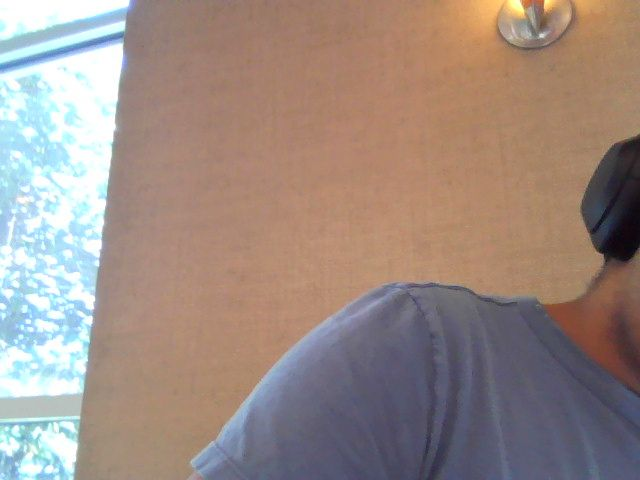

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
newFile = '/content/drive/My Drive/photo.jpg'

# Problem Time

Find the sum of the R value in the first column

Split the problem in mulitple sections

# Ideas 

Ai that auto debugs code or could be alerting for specific ideas
Manipulate sound
Turn music to different sounds
Parking, making it better
Able to detect voice much better
Take all pop songs and build a deep learning more which can make a song
Create a game which simulates red lights and random cars come with random speeds, build software to make least cars slow down
Courses recommendations
Facial recognition for behavior in classroom and record attendence
Signature tracking
Make sure that when a song is playing, the Google maps notification doesn't come during a beat drop
Make sure that when a song is playing, the Google maps notification doesn't come during an beat drop
Debt Tracker - A money lending manager app that will keep track of the people (friends, etc.) who owe you money and those whom you owe money. It will have the names of such people, the pending amount, due dates, etc. It will also alert you of due dates and allow you to make payments via integrated payment options.
Anti-Smartphone Addiction - An anti-smartphone addiction app that will have many features aimed to help people avoid getting addicted to their phones. It will show timely notifications, send overuse alerts, show tips and suggestions for reducing the use of phones, etc.
Startup Assistance - Startup assistance app to help startups and new entrepreneurs find answers to common questions related to starting a new business, finding clients, getting investment, business tips and everything else. Talk to businessmen as well!
Investment - AI-based Investment App that will make your investment decisions automatically based on the market research and analysis and will invest on your behalf. You can choose how much you want it to invest and how frequently you want to receive credits in your account.
Music - This can be one of the best app ideas for music lovers. This app will initially look as a normal mp3 player but it will be much more than just that. It will let the others in the user’s contact list know what the person is listening and if they like that song, they will be able to share that song so that both of them can listen at the same time. https://towardsdatascience.com/a-music-taste-analysis-using-spotify-api-and-python-e52d186db5fc
Text to Multiple People - When you are sending multiple people the same text but you dont want to make a group chat, you can use this app to select the contacts to send it to, create the message, and hit send!
Smart Receipt - This app will give the retailers an option to send the product receipt via email or text. This will reduce the over-consumption of paper and make the organizing of receipts easy for the customer.
Workout Coach - Select a muscle to focus on and create a workout. Tap multiple muscles to add to your workout. Set goals, get reminders, and get xp/points for completing your goals!
Virtual Interior Design- AR technologies are already developed enough to use them as a basis for great products created for various areas. For example, you can develop an application allowing you to add a photo of your room and then try “furnishing” it with different interior design elements: change wall colors, experiment with light, add and remove curtains, furniture items, etc.
Dash Cam App - Nowadays, most phones have 2 cameras, and one of them is often a wide-angle one suitable for a dash cam. Add a large touch screen, a large amount of memory, GPS, etc. to these features, and you get a practically perfect device for a purpose like this. If your app supports cloud storage services, it will allow you to upload your recorded videos to the web to free up space on your smartphone. You can also implement voice control and Google Assistant support into your app to give users the possibility to activate the app by voice command rather than search for the dedicated app icon.
A simulation that represents the car window on a rainy day which like shows the lower visibility. An AI that tries out different wipers that gives the best clearence
On a rainy day the car on front of car track is shown, track that to drive
Ai that mixes 2 songs together
CCTV person tracking
race detection
Chrome extension which reads terms of conditions and summarize 